In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs
sns.set_theme(style="whitegrid")

#### Hinge loss:

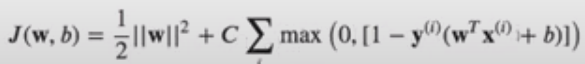

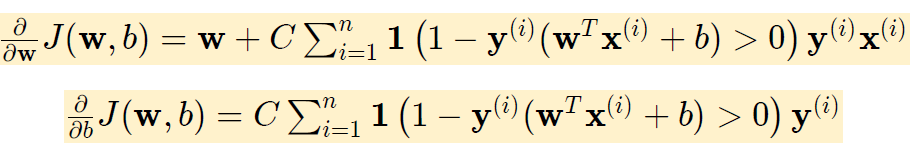

In [15]:
class softSVM:
    def __init__(self, C):
        self.support_vectors = None
        self.C = C
        self.b = None
    def __decision_function(self, X):
        return X.dot(self.w) + self.b
    def __loss(self, margin):
        return 0.5 * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))
    def __margin(self, X, y):
        return y * self.__decision_function(X)
    def fit(self, X, y, lr=1e-3, epochs=500):
        n, d = X.shape
        self.w = np.random.randn(d)
        self.b = 0
        
        losses = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__loss(margin)
            losses.append(loss)
            
            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.w = self.w - lr * d_w
            
            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b
            
        self._support_vectors = np.where(margin <= 1)[0]
    def predict(self, X):
        return np.sign(self.__decision_function(X))
    def score(self, X, y):
        p = self.predict(X)
        return np.mean(y == P)

In [16]:
X, Y = make_blobs(n_samples=60, n_features=2, centers=[[0,0],[6,6]], cluster_std=1, random_state=12)
Y = np.where(Y == 0, -1, 1)

In [17]:
print(X.shape, Y.shape)

(60, 2) (60,)


In [18]:
svm = softSVM(C=1)
svm.fit(X, Y)
print(svm.w, svm.b)

[0.54084451 0.1954533 ] -2.0129999999999924


In [19]:
newExample = np.array([-2.2,2.2])
svm.predict(newExample)

-1.0

Adding noise to the input data...

In [20]:
X, Y = make_blobs(n_samples=60, n_features=2, centers=2, cluster_std=1.1, random_state=0)
Y = np.where(Y == 0, -1, 1)

In [21]:
Y

array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1])

In [22]:
svm = softSVM(C=100)  #As the value of C increases, them margin gets smaller.  Value of b increases
svm.fit(X, Y)
print(svm.w, svm.b)

[ 0.63797062 -5.18359007] 10.900000000000018


In [23]:
newExample = np.array([-2.2,2.2])
svm.predict(newExample)

-1.0

However, softSVM will not work well if you've non-linear decision boundaries.  In such cases, use KernelSVM

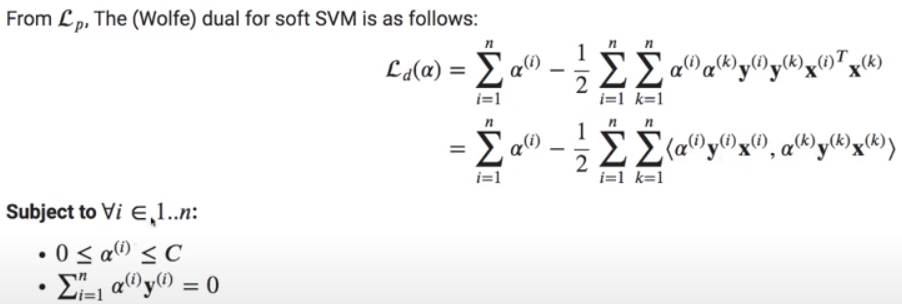

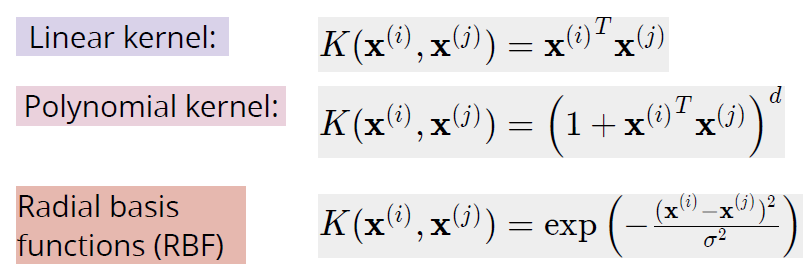

In [24]:
class SVMDualProblem():
    def __init__(self, C=0, kernel='rbf', sigma=0.1, degree=2):
        self.C = C
        if kernel == 'poly':
            self.kernel = self.__polynomial_kernel
            self.degree = degree
        else:
            self.kernel = self.__rbf_kernel
            self.sigma = sigma
        self.alpha = None
        self.b = 0
    def __rbf_kernel(self, X1, X2):
        return np.exp(-(1/self.sigma ** 2) * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)
    
    def __polynomial_kernel(self, X1, X2):
        return (self.C + X1.dot(X2.T)) ** self.degree
    
    def fit(self, X, y, lr=1e-3, epochs=100):
        self.alpha = np.random.random(X.shape[0])
        self.X = X
        self.y = y
        self.b = 0
        y_iy_kx_ix_k = np.outer(y, y) * self.kernel(X, X)
        
        losses = []
        for _ in range(epochs):
            gradient = np.ones(X.shape[0]) - y_iy_kx_ix_k.dot(self.alpha)
            self.alpha += lr * gradient
            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0
            
            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_kx_ix_k)
            losses.append(loss)
        index = np.where((self.alpha > 0) & (self.alpha < self.C))[0]
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        self.b = np.mean(b_i)
    def __decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
    def predict(self, X):
        return np.sign(self.__decision_function(X))
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.maen(y == y_hat)

In [25]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=0.5, noise=0.08)
y[y == 0] == -1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [26]:
svm = SVMDualProblem(C=1.0, kernel='poly', degree=2)
svm.fit(X, y, lr=1e-3)
print(svm.C)
print(svm.b)
print(svm.alpha)

1.0
-1.347653483019556
[8.97572443e-01 0.00000000e+00 1.54376796e-01 2.02789692e-01
 0.00000000e+00 0.00000000e+00 4.67515220e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.63847051e-01 6.90475748e-02
 3.36906645e-01 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.39503402e-01 4.53685089e-01
 0.00000000e+00 0.00000000e+00 5.17960737e-01 4.05011142e-01
 0.00000000e+00 7.02080900e-01 0.00000000e+00 0.00000000e+00
 2.65661407e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 5.80442690e-01
 3.33647307e-01 0.00000000e+00 8.43149651e-01 0.00000000e+00
 0.00000000e+00 6.72165133e-01 4.29453388e-01 2.70598240e-01
 9.51429714e-01 1.00000000e+00 0.00000000e+00 6.82468224e-02
 0.00000000e+00 9.30884087e-01 3.15546057e-01 2.08732340e-01
 5.31853988e-01 6.17353514e-01 4.03231419e-01 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.88829140e-01
 0.00000000e+00 1.11898232e-01 0.00000000e+00 0.00000000e+00
 